<img src="../static/aeropython_name_mini.png" alt="AeroPython" style="width: 300px;" />

# Clase 3a: Entrada/Salida y Álgebra Lineal

_Una vez hemos visto el manejo básico de arrays en Python con NumPy, es hora de pasar a operaciones más interesantes como son las propias del Álgebra Lineal._

_Los productos escalares y las inversiones de matrices están por todas partes en los programas científicos e ingenieriles, así que vamos a estudiar cómo se realizan en Python._

## Álgebra lineal

Como sabemos, las operaciones del álgebra lineal aparecen con mucha frecuencia a la hora de resolver sistemas de ecuaciones en derivadas parciales y en general al linealizar problemas de todo tipo, y suele ser necesario resolver sistemas con un número enorme de ecuaciones e incógnitas. Gracias a los arrays de NumPy podemos abordar este tipo de cálculos en Python, ya que todas las funciones están escritas en C o Fortran y tenemos la opción de usar bibliotecas optimizadas al límite.

El paquete de álgebra lineal en NumPy se llama `linalg`, así que importando NumPy con la convención habitual podemos acceder a él escribiendo `np.linalg`. Si imprimimos la ayuda del paquete vemos que tenemos funciones para:

* Funciones básicas (norma de un vector, inversa de una matriz, determinante, traza)
* Resolución de sistemas
* Autovalores y autovectores
* Descomposiciones matriciales (QR, SVD)
* Pseudoinversas

In [1]:
import numpy as np

In [2]:
help(np.linalg)

Help on package numpy.linalg in numpy:

NAME
    numpy.linalg

DESCRIPTION
    Core Linear Algebra Tools
    -------------------------
    Linear algebra basics:
    
    - norm            Vector or matrix norm
    - inv             Inverse of a square matrix
    - solve           Solve a linear system of equations
    - det             Determinant of a square matrix
    - lstsq           Solve linear least-squares problem
    - pinv            Pseudo-inverse (Moore-Penrose) calculated using a singular
                      value decomposition
    - matrix_power    Integer power of a square matrix
    
    Eigenvalues and decompositions:
    
    - eig             Eigenvalues and vectors of a square matrix
    - eigh            Eigenvalues and eigenvectors of a Hermitian matrix
    - eigvals         Eigenvalues of a square matrix
    - eigvalsh        Eigenvalues of a Hermitian matrix
    - qr              QR decomposition of a matrix
    - svd             Singular value decomposition 

Recordemos que si queremos usar una función de un paquete pero no queremos escribir la "ruta" completa cada vez, podemos usar la sintaxis `from package import func`:

In [3]:
from numpy.linalg import norm, det
norm

<function numpy.linalg.linalg.norm>

El producto matricial usual (no el que se hace elemento a elemento, sino el del álgebra lineal) se calcula con la misma función que el producto matriz-vector y el producto escalar vector-vector: con la función `dot`, que **no** está en el paquete `linalg` sino directamente en `numpy` y no hace falta importarlo.

In [4]:
np.dot

<function numpy.core._dotblas.dot>

Una consideración importante a tener en cuenta es que en NumPy no hace falta ser estricto a la hora de manejar vectores como si fueran matrices columna, siempre que la operación sea consistente. Un vector es una matriz con una sola dimensión: por eso si calculamos su traspuesta no funciona.

In [5]:
M = np.array([
    [1, 2],
    [3, 4]
])
v = np.array([1, -1])

In [6]:
v.T

array([ 1, -1])

In [7]:
u = np.dot(M, v)
u

array([-1, -1])

Para hacer comparaciones entre arrays de punto flotante se pueden usar las funciones `np.allclose` y `np.isclose`. La primera comprueba si todos los elementos de los arrays son iguales dentro de una tolerancia, y la segunda compara elemento a elemento y devuelve un array de valores `True` y `False`.

In [8]:
u, v

(array([-1, -1]), array([ 1, -1]))

In [9]:
np.allclose(u, v)

False

In [10]:
np.isclose(0.0, 1e-8, atol=1e-10)

False

### Ejercicios

1- Hallar el producto de estas dos matrices y su determinante:

$$\begin{pmatrix} 1 & 0 & 0 \\ 2 & 1 & 1 \\ -1 & 0 & 1 \end{pmatrix} \begin{pmatrix} 2 & 3 & -1 \\ 0 & -2 & 1 \\ 0 & 0 & 3 \end{pmatrix}$$

In [11]:
from numpy.linalg import det

In [12]:
A = np.array([
    [1, 0, 0],
    [2, 1, 1],
    [-1, 0, 1]
])
B = np.array([
    [2, 3, -1],
    [0, -2, 1],
    [0, 0, 3]
])
print(A)
print(B)

[[ 1  0  0]
 [ 2  1  1]
 [-1  0  1]]
[[ 2  3 -1]
 [ 0 -2  1]
 [ 0  0  3]]


In [13]:
C = np.dot(A, B)
C

array([[ 2,  3, -1],
       [ 4,  4,  2],
       [-2, -3,  4]])

In [14]:
det(C)

-12.0

2- Resolver el siguiente sistema:

$$ \begin{pmatrix} 2 & 0 & 0 \\ -1 & 1 & 0 \\ 3 & 2 & -1 \end{pmatrix} \begin{pmatrix} 1 & 1 & 1 \\ 0 & 1 & 2 \\ 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} -1 \\ 3 \\ 0 \end{pmatrix} $$

In [15]:
M = np.dot(
np.array([
    [2, 0, 0],
    [-1, 1, 0],
    [3, 2, -1]
]),
np.array([
    [1, 1, 1],
    [0, 1, 2],
    [0, 0, 1]
]))
M

array([[ 2,  2,  2],
       [-1,  0,  1],
       [ 3,  5,  6]])

In [16]:
x = np.linalg.solve(M, np.array([-1, 3, 0]))
x

array([ 0.5, -4.5,  3.5])

In [17]:
np.allclose(np.dot(M, x), np.array([-1, 3, 0]))

True

3- Hallar la inversa de la matriz $H$ y comprobar que $H H^{-1} = I$ (recuerda la función `np.eye`)

In [18]:
A = np.arange(1, 37).reshape(6,6)
A[1, 1::2] = 0
A[3, ::2] = 1
A[4, :] += 30
B = (2 ** np.arange(36)).reshape((6,6))
H = A + B
print(H)

[[          2           4           7          12          21          38]
 [         71         128         265         512        1035        2048]
 [       4109        8206       16399       32784       65553      131090]
 [     262145      524308     1048577     2097174     4194305     8388632]
 [   16777271    33554488    67108921   134217786   268435515   536870972]
 [ 1073741855 -2147483616 -2147483615 -2147483614 -2147483613 -2147483612]]


C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:5: RuntimeWarning: invalid value encountered in power


In [19]:
np.linalg.det(H)

5.130623505912694e+20

In [20]:
Hinv = np.linalg.inv(H)

In [21]:
np.isclose(np.dot(Hinv, H), np.eye(6))

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]], dtype=bool)

In [22]:
np.set_printoptions(precision=3)
print(np.dot(Hinv, H))

[[  1.000e+00   1.290e-10   2.579e-10   5.158e-10   1.032e-09   2.064e-09]
 [  6.927e-11   1.000e+00   1.913e-10   2.689e-10   9.286e-10   1.938e-09]
 [ -1.055e-11   4.050e-11   1.000e+00   3.703e-10   3.315e-10  -5.222e-10]
 [ -2.604e-11  -5.221e-11  -9.829e-11   1.000e+00  -4.087e-10  -9.132e-10]
 [  1.455e-11  -5.821e-11  -5.821e-11  -2.328e-10   1.000e+00   4.657e-10]
 [  0.000e+00   2.910e-11   0.000e+00   5.821e-11   0.000e+00   1.000e+00]]


<div class="alert alert-warning">¡No funciona! Y no solo eso sino que los resultados varían de un ordenador a otro.</div>

4- Comprobar el número de condición de la matriz $H$.

In [23]:
np.linalg.cond(H)

9577308125.2505741

<div class="alert alert-warning">La matriz está mal condicionada.</div>

## Secciones de arrays

Hasta ahora hemos visto cómo acceder a elementos aislados del array, pero la potencia de NumPy está en poder acceder a secciones enteras. Para ello se usa la sintaxis `inicio:final:paso`: si alguno de estos valores no se pone toma un valor por defecto. Veamos ejemplos:

In [24]:
M = np.arange(36, dtype=float).reshape(4, 9)
M

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.],
       [  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.],
       [ 18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.],
       [ 27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.]])

In [25]:
# De la segunda a la tercera fila, incluida
M[1:3]

array([[  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.],
       [ 18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.]])

In [26]:
# Hasta la tercera fila sin incluir y de la segunda a la quinta columnas saltando dos
M[:2, 1:5:2]
#M[1:2:1, 1:5:2]  # Equivalente

array([[  1.,   3.],
       [ 10.,  12.]])

### Ejercicio

Pintar un tablero de ajedrez usando la función `plt.matshow`.

In [27]:
tablero = np.zeros([8, 8], dtype=int)

tablero[0::2, 1::2] = 1
tablero[1::2, 0::2] = 1

tablero

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

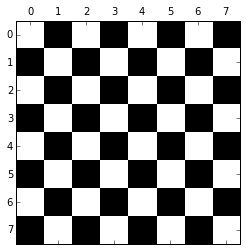

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(tablero, cmap=plt.cm.gray_r)

## Entrada/Salida

Con E/S (I/O en inglés) entendemos leer y escribir datos archivos. Es algo que necesitaremos hacer con relativa frecuencia, y en NumPy es muy sencillo de hacer. Para el caso de la **lectura** se usa la función `np.loadtxt`.

Para practicar, vamos a leer el archivo `temperaturas.csv` que contiene datos diarios de temperaturas en Nueva York entre el 1 de enero de 2013 y el 1 de enero de 2014, obtenidos gratuitamente de http://ncdc.noaa.gov/. Como los hemos descargado en formato CSV habrá que tener algunas precauciones a la hora de leer el archivo.

In [29]:
!head ../static/temperaturas.csv  # Esta línea no funciona en Windows

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [30]:
datos = np.loadtxt("../static/temperaturas.csv",
                   skiprows=1,  # Saltamos una línea
                   usecols=(1, 2, 3),  # Solo columnas 2, 3 y 4
                   delimiter=',')  # Separados por comas

In [31]:
datos[:9]

array([[  2.013e+07,   4.400e+01,  -3.300e+01],
       [  2.013e+07,   6.000e+00,  -5.600e+01],
       [  2.013e+07,   0.000e+00,  -4.400e+01],
       [  2.013e+07,   2.800e+01,  -1.100e+01],
       [  2.013e+07,   5.600e+01,   0.000e+00],
       [  2.013e+07,   7.800e+01,   1.100e+01],
       [  2.013e+07,   7.200e+01,   2.800e+01],
       [  2.013e+07,   8.900e+01,   1.700e+01],
       [  2.013e+07,   9.400e+01,   3.900e+01]])

La primera columna es un entero con formato "AAAAMMDD" que vamos a ignorar. Las temperaturas están medidas en décimas de grado Celsius, así que hay que pasarlas a grados Celsius. Vamos a calcular también la temperatura media.

In [32]:
Tmax = datos[:, 1] / 10
Tmin = datos[:, 2] / 10
Tavg = (Tmax + Tmin) / 2

Como vamos a ignorar la columna de las fechas tenemos que crear un dominio para el eje x. Simplemente construiremos un array de enteros desde 0 hasta 365.

In [33]:
x = np.arange(366)

Supongamos que ahora queremos guardar nuestra tabla de datos en un archivo txt, para poder cargarlo ya modificado más adelante. Una manera fácil de hacerlo sería con otra función de NumPy: `np.savetxt`. Lo usaremos con los argumentos opcionales  `fmt='%.5f', newline = '\r\n'` para obtener un fichero *bonito* que podamos entender de un vistazo.

In [34]:
matriz_datos = np.zeros([366, 4])
matriz_datos[:, 0] = x
matriz_datos[:, 1] = Tmax
matriz_datos[:, 2] = Tmin
matriz_datos[:, 3] = Tavg

print(matriz_datos[:10])

np.savetxt('archivo_datos.txt', matriz_datos, fmt='%.5f', newline = '\r\n')

[[ 0.    4.4  -3.3   0.55]
 [ 1.    0.6  -5.6  -2.5 ]
 [ 2.    0.   -4.4  -2.2 ]
 [ 3.    2.8  -1.1   0.85]
 [ 4.    5.6   0.    2.8 ]
 [ 5.    7.8   1.1   4.45]
 [ 6.    7.2   2.8   5.  ]
 [ 7.    8.9   1.7   5.3 ]
 [ 8.    9.4   3.9   6.65]
 [ 9.    8.3   4.4   6.35]]


### Ejercicio

Y ahora representamos la evolución de la temperatura media (por ejemplo de color negro), indicando "Daily summaries" en el título, "Days" en el eje x y "Temperature (C)" en el eje y, usando la interfaz orientada a objetos de matplotlib (función `plt.subplots`). Podemos crear una zona rellena entre la máxima y la mínima con la función `fill_between(x, max, min)` (por ejemplo de color #4f88b1). Si los límites del eje x no quedan como queremos podemos usar la función `set_xlim(xmin, xmax)`.

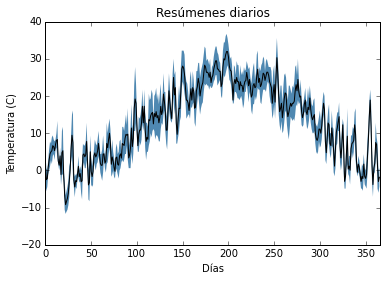

In [35]:
fig, ax = plt.subplots()

ax.plot(x, Tavg, 'k')
ax.set_xlim(0, 366)
ax.fill_between(x, Tmin, Tmax, facecolor='#4f88b1', edgecolor='none')
ax.set_title("Resúmenes diarios")
ax.set_xlabel("Días")
ax.set_ylabel("Temperatura (C)")

---

_Ya hemos aprendido a efectuar algunas operaciones útiles con NumPy e incluso hemos hecho nuestro primer ejercicio de lectura de datos. Estamos en condiciones de empezar a escribir programas más interesantes, pero aún queda lo mejor._

* [Álgebra lineal en Python con NumPy en Pybonacci](http://pybonacci.org/2012/06/07/algebra-lineal-en-python-con-numpy-i-operaciones-basicas/)

Si te ha gustado esta clase:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Curso_AeroPython" data-text="Aprendiendo Python con" data-via="pybonacci" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

###### <a href="https://twitter.com/Pybonacci" class="twitter-follow-button" data-show-count="false">Follow @Pybonacci</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  <a href="https://twitter.com/Alex__S12" class="twitter-follow-button" data-show-count="false" align="right";>Follow @Alex__S12</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  <a href="https://twitter.com/newlawrence" class="twitter-follow-button" data-show-count="false" align="right";>Follow @newlawrence</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/juanluiscanor" data-format="inline" data-related="false"></script> <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/alejandrosaezm" data-format="inline" data-related="false"></script>

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [36]:
%%html
<a href="https://twitter.com/Pybonacci" class="twitter-follow-button" data-show-count="false">Follow @Pybonacci</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

In [37]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())